In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

In [2]:
MainPath = os.path.abspath(os.path.dirname('__file__')) #  os.path.dirname(os.path.realpath('__file__'))
data_dictionary = {}
for filename in os.listdir(MainPath):
    if '.csv' in filename:
        name = filename.split('.')[0]
        data_dictionary[name] = pd.read_csv(filename)

In [3]:
data_dictionary['Transaction_ID']

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [4]:
data_dictionary['Transaction_ID']['Customer ID'].value_counts().shape

(49171,)

In [5]:
data_dictionary['Transaction_ID'].groupby(['Customer ID'])['Payment_Mode'].value_counts()

Customer ID  Payment_Mode
1            Card            18
             Cash            11
2            Card            25
             Cash            15
3            Card            30
                             ..
59998        Cash             4
59999        Card             4
             Cash             4
60000        Card             9
             Cash             9
Name: Payment_Mode, Length: 80703, dtype: int64

In [6]:
data_dictionary['Customer_ID']

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
list(data_dictionary['Customer_ID']['Customer ID'].value_counts()).count(1)

49171

Each Customer has 'x' transactions, maybe that variable have a relationship with Age, Income or Gender. Each customer has a payment mode, the payment mode also can have a relationship with the amount of transactions a given customer has made.

In [8]:
data_dictionary['City']

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [9]:
num_users = [ int(elem.replace(',', '')) for elem in data_dictionary['City'].Users.values]
num_users

[302149,
 164468,
 144132,
 17675,
 27247,
 12994,
 69995,
 6133,
 22157,
 24701,
 12421,
 14978,
 25063,
 5712,
 213609,
 7044,
 3643,
 127001,
 9270,
 80021]

In [10]:
data_dictionary['Cab_Data']

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [11]:
list(data_dictionary['Transaction_ID']['Transaction ID'].isnull().values).count(True)

0

In [12]:
list(data_dictionary['Transaction_ID'].duplicated(subset=['Transaction ID']).values).count(True)

0

In [13]:
trans1 = data_dictionary['Transaction_ID']['Transaction ID'].values
trans2 = data_dictionary['Cab_Data']['Transaction ID'].values
print(trans1.shape)
print(trans2.shape)

(440098,)
(359392,)


In [14]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [15]:
def complement(lst1,lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    return lst3

In [16]:
NotIDs = intersection(trans2,trans1)

In [17]:
NotIDs = np.array(NotIDs)
NotIDs.shape

(359392,)

In [18]:
compID = complement(trans1,trans2)
np.array(compID).shape

(80706,)

In [19]:
len(compID)

80706

In [20]:
data_dictionary['Cab_Data']['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

## Analysis 1:

Filter the Transaction ID and consider only the ones that are in dataset Cab_Data. Then include the Customer ID, number of transactions, age, income, and gender.

Consider 2 dataframes: First one with the Customer ID (Eliminate repeated), Age, Gender, Payment Mode (col1 Cash, col2 Card), income and Number of Transactions. 

In [21]:
data_dictionary['Transaction_ID']

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [22]:
dfcopy = data_dictionary['Transaction_ID'].copy()

In [23]:
for index, row in data_dictionary['Transaction_ID'].iterrows():
    pay_mode = row['Payment_Mode']
    dfcopy.at[index,pay_mode] = 1

In [24]:
dfcopy.fillna(0,inplace=True)

In [25]:
dfcopy1 = dfcopy.drop(columns=['Transaction ID', 'Payment_Mode'])
dfcopy1

,Customer ID,Card,Cash
0,29290,1.0,0.0
1,27703,1.0,0.0
2,28712,0.0,1.0
3,28020,0.0,1.0
4,27182,1.0,0.0
...,...,...,...
440093,53286,0.0,1.0
440094,52265,0.0,1.0
440095,52175,1.0,0.0
440096,52917,1.0,0.0


In [26]:
dfcopy2 = dfcopy1.groupby('Customer ID', sort=False, as_index=False)[['Card','Cash']].sum()
dfcopy2

,Customer ID,Card,Cash
0,29290,2.0,1.0
1,27703,3.0,1.0
2,28712,2.0,2.0
3,28020,1.0,3.0
4,27182,3.0,1.0
...,...,...,...
49166,12490,0.0,1.0
49167,14971,1.0,0.0
49168,41414,1.0,0.0
49169,41677,0.0,1.0


In [27]:
data_dictionary['Customer_ID']

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [28]:
JoinDF1 = data_dictionary['Customer_ID'].join(dfcopy2,lsuffix=' Repeat')
JoinDF1.drop(columns=['Customer ID Repeat','Customer ID'],inplace=True)
JoinDF1

,Gender,Age,Income (USD/Month),Card,Cash
0,Male,28,10813,2.0,1.0
1,Male,27,9237,3.0,1.0
2,Male,53,11242,2.0,2.0
3,Male,23,23327,1.0,3.0
4,Male,33,8536,3.0,1.0
...,...,...,...,...,...
49166,Male,33,18713,0.0,1.0
49167,Male,30,15346,1.0,0.0
49168,Male,38,3960,1.0,0.0
49169,Male,23,19454,0.0,1.0


In [29]:
valuesDF1 = JoinDF1.values
valuesDF1

array([['Male', 28, 10813, 2.0, 1.0],
       ['Male', 27, 9237, 3.0, 1.0],
       ['Male', 53, 11242, 2.0, 2.0],
       ...,
       ['Male', 38, 3960, 1.0, 0.0],
       ['Male', 23, 19454, 0.0, 1.0],
       ['Female', 32, 10128, 1.0, 0.0]], dtype=object)

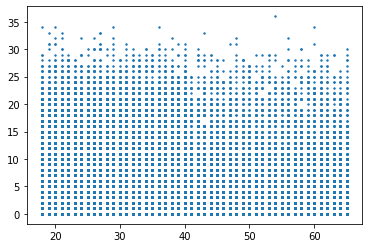

In [30]:
plt.scatter(valuesDF1[:,1],valuesDF1[:,3],s=2)
plt.show()

In [31]:
JoinDF1.drop(columns='Gender').corr()

,Age,Income (USD/Month),Card,Cash
Age,1.000000,0.000156,0.000988,-0.001913
Income (USD/Month),0.000156,1.000000,0.007516,0.009015
Card,0.000988,0.007516,1.000000,0.834568
Cash,-0.001913,0.009015,0.834568,1.000000


In [32]:
import seaborn as sns

In [33]:
JoinDF1

,Gender,Age,Income (USD/Month),Card,Cash
0,Male,28,10813,2.0,1.0
1,Male,27,9237,3.0,1.0
2,Male,53,11242,2.0,2.0
3,Male,23,23327,1.0,3.0
4,Male,33,8536,3.0,1.0
...,...,...,...,...,...
49166,Male,33,18713,0.0,1.0
49167,Male,30,15346,1.0,0.0
49168,Male,38,3960,1.0,0.0
49169,Male,23,19454,0.0,1.0


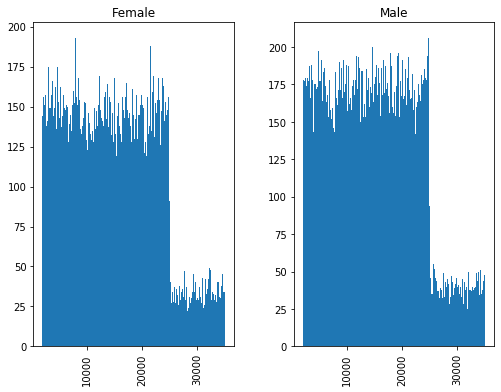

In [41]:
hist = JoinDF1.hist(column='Income (USD/Month)',by='Gender',bins=200,figsize=(8,6))

In [56]:
dates = np.sort(data_dictionary['Cab_Data']['Date of Travel'].values)-data_dictionary['Cab_Data']['Date of Travel'].values.min()+1

In [59]:
dates

array([   1,    1,    1, ..., 1095, 1095, 1095], dtype=int64)

In [74]:
len(set(dates))

1095

In [70]:
np.sort(data_dictionary['Cab_Data']['Date of Travel'].values).min()

42371

In [71]:
np.sort(data_dictionary['Cab_Data']['Date of Travel'].values).max()

43465

## Analysis 2: Profit Analysis

Analyze the profit of each cab company yearly, profit per km, total of rides, profit per rides

In [217]:
Cab_df = data_dictionary['Cab_Data'].copy() # Define dataframe Cab_df (from Cab_Data.csv)
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42371,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42371,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42371,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42371,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43465,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43465,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43465,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43465,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


Column: Profit of each transaction ID

In [218]:
Cab_df['Profit'] = Cab_df['Price Charged'] - Cab_df['Cost of Trip']
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42371,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42371,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42371,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42371,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43465,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43465,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43465,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43465,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


Profit per KM

In [219]:
Cab_df['Profit per KM'] = Cab_df['Profit']/Cab_df['KM Travelled']
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
0,10000011,42371,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266
1,10000012,42371,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558
3,10000014,42371,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751
4,10000015,42371,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439
...,...,...,...,...,...,...,...,...,...
359387,10440101,43465,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000
359388,10440104,43465,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667
359389,10440105,43465,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270
359390,10440106,43465,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500


Change Date of Travel to real dates:

In [220]:
min_num = Cab_df['Date of Travel'].min()
Cab_df['Date of Travel'] = Cab_df['Date of Travel'] - min_num  # Start date from
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
0,10000011,0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266
1,10000012,0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904
2,10000013,0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558
3,10000014,0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751
4,10000015,0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439
...,...,...,...,...,...,...,...,...,...
359387,10440101,1094,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000
359388,10440104,1094,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667
359389,10440105,1094,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270
359390,10440106,1094,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500


In [221]:
import datetime

In [222]:
day1 = datetime.date(2016,1,1) # First day of 2016
day1 = pd.Timestamp(day1) # Creat Timestamp
day1

Timestamp('2016-01-01 00:00:00')

In [223]:
deltas = pd.to_timedelta(Cab_df['Date of Travel'],unit='D') # Change values to days format
days_format = day1+deltas
days_format

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
359387   2018-12-30
359388   2018-12-30
359389   2018-12-30
359390   2018-12-30
359391   2018-12-30
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [224]:
Cab_df['Date of Travel'] = pd.Series(pd.DatetimeIndex(days_format).year) # Create column of years(Only relevant information)
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
0,10000011,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266
1,10000012,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904
2,10000013,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558
3,10000014,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751
4,10000015,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000
359388,10440104,2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667
359389,10440105,2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270
359390,10440106,2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500


In [225]:
Profit_Mean_Per_Year = Cab_df.groupby(['Date of Travel','Company'])['Profit'].mean()
Profit_Mean_Per_Year

Date of Travel  Company   
2016            Pink Cab       69.120573
                Yellow Cab    168.949702
2017            Pink Cab       66.493710
                Yellow Cab    169.033861
2018            Pink Cab       52.829152
                Yellow Cab    143.586680
Name: Profit, dtype: float64

In [226]:
Profit_Av_Per_km = Cab_df.groupby(['Date of Travel','Company'])['Profit per KM'].mean()
Profit_Av_Per_km

Date of Travel  Company   
2016            Pink Cab      3.063152
                Yellow Cab    7.473617
2017            Pink Cab      2.936993
                Yellow Cab    7.501578
2018            Pink Cab      2.331991
                Yellow Cab    6.373933
Name: Profit per KM, dtype: float64

[0 1 2]


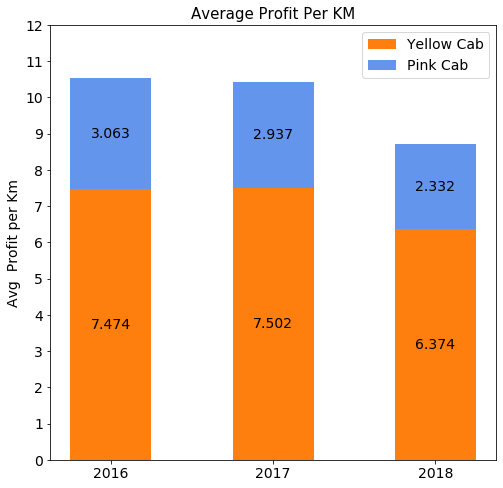

In [251]:
N = 3

years = ['2016','2017','2018']

YellowVals = [val for idx,val in enumerate(Profit_Av_Per_km) if idx%2 != 0 ]
PinkVals = [val for idx,val in enumerate(Profit_Av_Per_km) if idx%2 == 0 ]

ind = np.arange(N)    # the x locations for the groups
print(ind)
width = 0.5       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(8,8))

p1 = plt.bar(ind, YellowVals, width,color='tab:orange')
p2 = plt.bar(ind, PinkVals, width, bottom=YellowVals ,color='cornflowerblue')

for xpos, ypos, yval in zip(ind, np.array(YellowVals)/2, YellowVals):
    plt.text(xpos, ypos, "%.3f"%yval, ha="center", va="center",fontsize=14)

for xpos, ypos, yval in zip(ind, np.array(YellowVals)+np.array(PinkVals)/2, PinkVals):
    plt.text(xpos, ypos, "%.3f"%yval, ha="center", va="center",fontsize=14)

plt.ylabel('Avg  Profit per Km',fontsize=14)
plt.title('Average Profit Per KM',fontsize=15)
plt.xticks(ind, years ,fontsize=14)
plt.yticks(np.arange(0, 13,1),fontsize=14)
plt.legend((p1[0], p2[0]), ('Yellow Cab', 'Pink Cab'),fontsize=14)

plt.show()

In [229]:
Cab_df['Profit % (Cost)'] = (Cab_df['Profit']/Cab_df['Cost of Trip'])*100 # Profit percentage over cost
Cab_df['Profit % (Price)'] = (Cab_df['Profit']/Cab_df['Price Charged'])*100 # Profit percentage over price
Cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Profit % (Cost),Profit % (Price)
0,10000011,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,18.274427,15.450869
1,10000012,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,7.067558,6.601026
2,10000013,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,28.236644,22.019169
3,10000014,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751,7.337273,6.835718
4,10000015,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439,17.227131,14.695516
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000,9.280303,8.492201
359388,10440104,2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667,6.459644,6.067692
359389,10440105,2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270,25.002145,20.001373
359390,10440106,2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500,28.182870,21.986456


In [230]:
Profit_Ave_Percentage_Cost = Cab_df.groupby(['Date of Travel','Company'])['Profit % (Cost)'].mean()
Profit_Ave_Percentage_Cost

Date of Travel  Company   
2016            Pink Cab      28.244277
                Yellow Cab    57.091683
2017            Pink Cab      27.080509
                Yellow Cab    57.295390
2018            Pink Cab      21.559535
                Yellow Cab    48.750677
Name: Profit % (Cost), dtype: float64

In [231]:
Profit_Ave_Percentage_Price = Cab_df.groupby(['Date of Travel','Company'])['Profit % (Price)'].mean()
Profit_Ave_Percentage_Price

Date of Travel  Company   
2016            Pink Cab      18.794366
                Yellow Cab    31.156470
2017            Pink Cab      17.942517
                Yellow Cab    31.258915
2018            Pink Cab      15.525354
                Yellow Cab    28.077877
Name: Profit % (Price), dtype: float64

In [244]:
TotalProfit = Cab_df.groupby(['Company'])['Profit'].sum()
TotalProfit

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [240]:
TotalRides = Cab_df['Company'].value_counts()
TotalRides

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [242]:
ProfitPerRide = TotalProfit/TotalRides
ProfitPerRide

Pink Cab       62.652174
Yellow Cab    160.259986
dtype: float64

In [250]:
Resumedf = pd.DataFrame({'Company':['Pink Cab','Yellow Cab'],'Profit':TotalProfit,
                        'Total Rides':TotalRides,'Profit Per Ride':ProfitPerRide})
Resumedf

,Company,Profit,Total Rides,Profit Per Ride
Pink Cab,Pink Cab,5.307328e+06,84711,62.652174
Yellow Cab,Yellow Cab,4.402037e+07,274681,160.259986


In [252]:
Total_Profits_Year = Cab_df.groupby(['Date of Travel','Company'])['Profit'].sum()
Total_Profits_Year

Date of Travel  Company   
2016            Pink Cab      1.782343e+06
                Yellow Cab    1.392754e+07
2017            Pink Cab      2.004985e+06
                Yellow Cab    1.653337e+07
2018            Pink Cab      1.520000e+06
                Yellow Cab    1.355946e+07
Name: Profit, dtype: float64

In [254]:
Total_Profits_Year[0]

1782343.1050000011

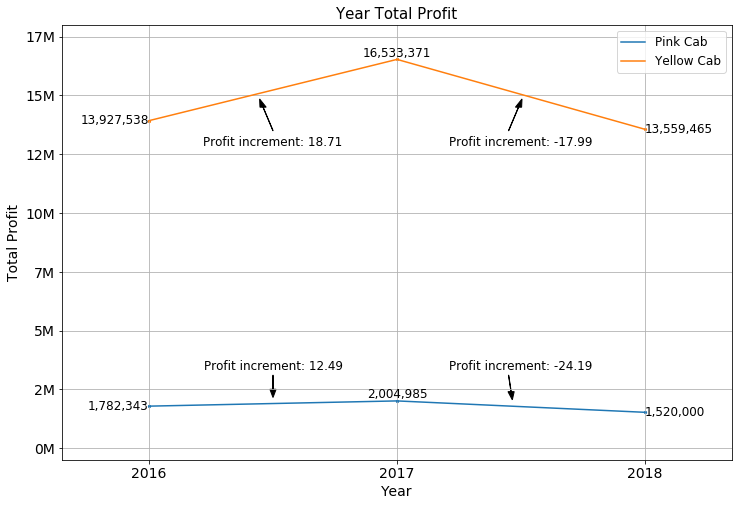

In [425]:
fig,ax = plt.subplots(figsize=(12,8))

# plt.figure()

# Profits per year
YellowTotalProf = np.array([val for idx,val in enumerate(Total_Profits_Year) if idx%2 != 0 ])
PinkTotalProf = np.array([val for idx,val in enumerate(Total_Profits_Year) if idx%2 == 0 ])

# Profit increment per year
YellowIncrements = (np.roll(YellowTotalProf,-1) - YellowTotalProf)/YellowTotalProf * 100 # Calculate the increments from one year to next
PinkIncrements = (np.roll(PinkTotalProf,-1) - PinkTotalProf)/PinkTotalProf * 100

# Scatter Plot
plt.scatter(years , PinkTotalProf *10e-7 ,s=5)
plt.scatter(years , YellowTotalProf *10e-7,s=5)

# Lineplot
plt.plot(years , PinkTotalProf *10e-7,label = 'Pink Cab')
plt.plot(years , YellowTotalProf * 10e-7, label = 'Yellow Cab')

# Add text for the profit values of each year
# Yellow
for idx,xpos, ypos in zip(ind,years, YellowTotalProf):
    if idx == 0:
        plt.text(xpos, ypos*10e-7, "{:,}".format(int("%.0f"%ypos)),ha="right",va="center",fontsize=12)
    elif idx == 1:
        plt.text(xpos, ypos*10e-7, "{:,}".format(int("%.0f"%ypos)),ha="center",va="bottom",fontsize=12)
    elif idx == 2:
        plt.text(xpos , ypos*10e-7,"{:,}".format(int("%.0f"%ypos)),ha="left",va="center",fontsize=12)
# Pink
for idx,xpos, ypos in zip(ind,years, PinkTotalProf):
    if idx == 0:
        plt.text(xpos, ypos*10e-7, "{:,}".format(int("%.0f"%ypos)) ,ha="right",va="center",fontsize=12)
    elif idx == 1:
        plt.text(xpos, ypos*10e-7, "{:,}".format(int("%.0f"%ypos)) ,ha="center",va="bottom",fontsize=12)
    elif idx == 2:
        plt.text(xpos , ypos*10e-7,"{:,}".format(int("%.0f"%ypos)) ,ha="left",va="center",fontsize=12)

# Add text for the increments in percentage:

plt.text(0.5,13,"Profit increment: %.2f"%YellowIncrements[0],ha="center",va="center",fontsize=12)
plt.text(1.5,13,"Profit increment: %.2f"%YellowIncrements[1],ha="center",va="center",fontsize=12)
plt.text(0.5,3.5,"Profit increment: %.2f"%PinkIncrements[0],ha="center",va="center",fontsize=12)
plt.text(1.5,3.5,"Profit increment: %.2f"%PinkIncrements[1],ha="center",va="center",fontsize=12)

plt.arrow(0.5,13.5,-0.04,1,head_width=0.025,head_length=0.35,color='k')
plt.arrow(1.45,13.5,0.04,1,head_width=0.025,head_length=0.35,color='k')
plt.arrow(0.5,3.1,0.,-0.6,head_width=0.025,head_length=0.35,color='k')
plt.arrow(1.45,3.1,0.01,-0.7,head_width=0.025,head_length=0.35,color='k')

# Title and labels
plt.title('Year Total Profit',fontsize=15)
plt.ylabel('Total Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)

plt.xlim([-0.35, 2.35])
plt.ylim([-0.5,18])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%dM"))

plt.grid(True)
plt.legend(fontsize=12)
plt.show()